# Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math

Making Random Data

Interesting but found the data from this tutorial was better:
https://towardsdatascience.com/wondering-how-to-build-an-anomaly-detection-model-87d28e50309

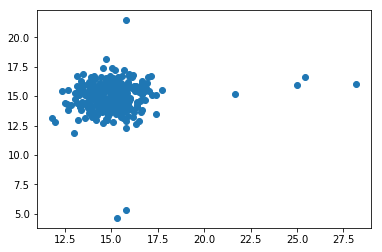

In [2]:
data_size = 307
mean = 15
stddev = 1
x = np.random.normal(mean, stddev, data_size) 
y = np.random.normal(mean, stddev, data_size)

for i in range(data_size):
    if i % 72 == 0:
        x[i] = np.random.uniform(0, 30, 1)
    elif i % 73 == 0:
        y[i] = np.random.uniform(0, 30, 1)

plt.scatter(x,y)

Importing data

In [8]:
dataset = sio.loadmat('anomalyData.mat')
X = dataset['X'] # Training data
Xval = dataset['Xval'] # Cross Validation
yval = dataset['yval'] # Output for Xval
X.shape

(307, 2)

Plotting data

Text(0, 0.5, 'Throughput(mb/s)')

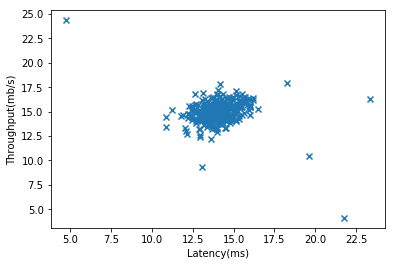

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker = "x")
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')

Estimating a gaussian for the data (My method)

In [10]:
def compute_mean(x):
    return sum(x)/(max(x.shape)) 

In [15]:
def compute_variance(x, mean):
    return sum((x - mean) ** 2)/(max(x.shape))

In [30]:
def estimate_gaussian(X):
    mean = [compute_mean(X[:,0]), compute_mean(X[:,1])]
    variance = [compute_variance(X[:,0], mean[0]), compute_variance(X[:,1], mean[1])]
    return mean, variance

In [35]:
mean, variance =estimate_gaussian(X)
print('mean = ', mean,'\n', 'variance = ', variance)

mean =  [14.1122257839456, 14.99771050813621] 
 variance =  [1.8326314134945172, 1.7097453308287784]


Tutorial Method

In [36]:
def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

mu, sigma2 = estimateGaussian(X)